# Qiskit Update 안내 

최신 버젼의 Qiskit을 설치하는 것! 헷갈리신다면 다음의 순서를 따라해보세요 

1. [아나콘다 설치](https://www.anaconda.com/)

    1-1. 만약 오래된 아나콘다가 설치되어 있다면 터미널을 열어 다음의 명령어를 실행해 보세요

    `conda update -n base conda`
    
2. 환경 만들기

`conda create -n qiskit python=3.10`

3. 쥬피터 노트북 혹은 쥬피터 랩 설치

`conda install jupyter notebook` 혹은 `conda install jupyterlab`

4. qiskit_ibm_provider 설치

`pip install qiskit qiskit_ibm_provider`

5. qiskit-ibm-runtime 설치

`pip install qiskit-ibm-runtime`


6.  Qiskit 설치 (머신러닝, 파이낸스 등 모든 라이브러리 한번에 설치)

`pip install qiskit[all]`


설치가 잘 되었는지 다음의 명령어를 실행해서 확인해 봅시다.

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table



## Qiskit 주요 업데이트 사항

다음의 라이브러리는 곧 삭제 됩니다.
- qiskit-ibmq-provider
- qiskit-aer

이 두가지를 대체하는 라이브러리의 사용법은 다음과 같습니다.

In [2]:
## qiskit-ibmq-provider alternative
from qiskit import *

from qiskit import QuantumCircuit
from qiskit_ibm_provider import IBMProvider

#IBMProvider.save_account(TOKEN)
#provider = IBMProvider()

#밋업을 위해 추가된 허브와 그룹, 프로젝트를 프로바이더에 설정
provider = IBMProvider(instance="ibm-q-yonsei/externalq-meetup/tutorials")


In [3]:
#밋업 참가자들에게 제공되는 양자 백엔드 목록
provider.backends()

[<IBMBackend('ibm_auckland')>, <IBMBackend('ibm_geneva')>]

이 둘 중 여러분의 실습을 위해 더 적은 Queue를 가진 백엔드를 선택하기 위해서는 다음의 코드를 실행하여 backend에 해당 정보를 저장해 두도록 합니다.

In [4]:
from qiskit_ibm_provider import least_busy

backend = least_busy(provider.backends())
backend

<IBMBackend('ibm_auckland')>

qiskit-aer 역시 곧 사라지게 됩니다. 다음과 같은 방식으로 새 라이브러리를 사용할 수 있습니다.

새 라이브러리를 사용해 시뮬레이터 함수들을 불러서 간단한 양자 회로를 실행해 보는 예제를 소개합니다.

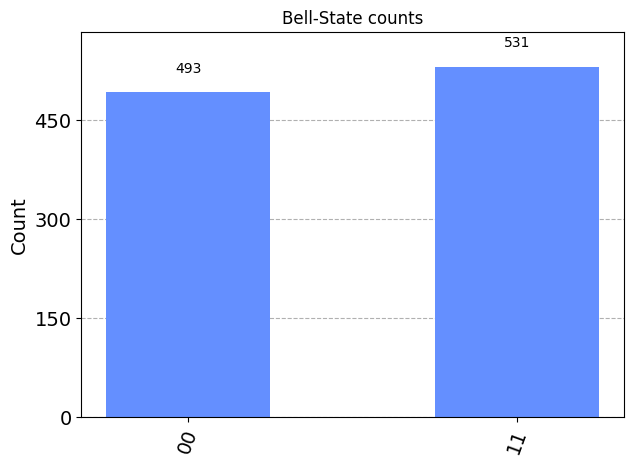

In [5]:
from qiskit.providers.aer import AerSimulator, PulseSimulator, QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.tools.visualization import plot_histogram, plot_state_city

#sim_backend = QasmSimulator()
sim_backend = AerSimulator()

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Run and get counts
result = sim_backend.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')


기타 업데이트와 릴리즈 상황은 다음의 [link](https://github.com/Qiskit/feedback/wiki/Release-Planning)에서 확인하실 수 있습니다.

새로 추가되는 기능이나 버그 픽스 등 외에도 주로 사용하던 기능이 사라질때 가장 불편하니 "deprecate" 부분을 잘 살펴보세요
